In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import os
from tensorflow.keras import datasets
from tensorflow.keras.layers import Input, Dense, Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")
data_dir=pathlib.Path('train')
valid_dir=pathlib.Path('valid')
test_dir=pathlib.Path('test')

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                                  width_shift_range=0.2,
                                                                  height_shift_range=0.2,
                                                                  shear_range=0.2,
                                                                  zoom_range=0.2,
                                                                  fill_mode='nearest',
                                                                  channel_shift_range=10,
                                                                  horizontal_flip= True, 
                                                                  rescale=1./255)
image_generator2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
image_generator3 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES), class_mode='categorical')
valid_data_gen = image_generator2.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES), class_mode='categorical')
test_data_gen = image_generator3.flow_from_directory(directory=str(test_dir),
                                                     batch_size=64,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES), class_mode='categorical')
train_data_gen
valid_data_gen

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.0005), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.0005), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',kernel_regularizer=l2(0.0005), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.0005), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0005), kernel_initializer='he_uniform') )
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(102, activation='softmax'))
model.summary()

model.load_weights('Trained3.h5')

opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])








TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Found 4918 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (Ba

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [5]:
model.fit_generator(generator=train_data_gen,
                   validation_data= valid_data_gen,callbacks=callbacks_list,
    epochs=100
)



Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 77 steps, validate for 26 steps
Epoch 1/100
76/77 [============================>.] - ETA: 25s - loss: 5.0669 - accuracy: 0.7206
Epoch 00001: val_accuracy improved from -inf to 0.63858, saving model to weights.best.hdf5
77/77 [==============================] - 2586s 34s/step - loss: 5.0715 - accuracy: 0.7202 - val_loss: 5.9167 - val_accuracy: 0.6386
Epoch 2/100
76/77 [============================>.] - ETA: 1s - loss: 5.0501 - accuracy: 0.7639
Epoch 00002: val_accuracy improved from 0.63858 to 0.74603, saving model to weights.best.hdf5
77/77 [==============================] - 107s 1s/step - loss: 5.0472 - accuracy: 0.7647 - val_loss: 5.3586 - val_accuracy: 0.7460
Epoch 3/100
76/77 [============================>.] - ETA: 1s - loss: 5.0204 - accuracy: 0.7761
Epoch 00003: val_accuracy did not improve from 0.74603
77/77 [==============================] - 104

In [0]:
model.save('Trained3.h5')

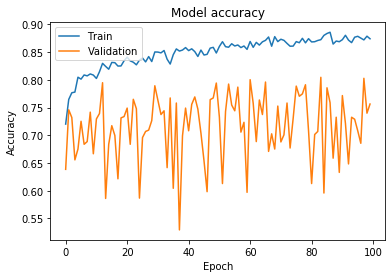

In [7]:
import matplotlib.pyplot as plt
# print(model.history.history)
# Plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

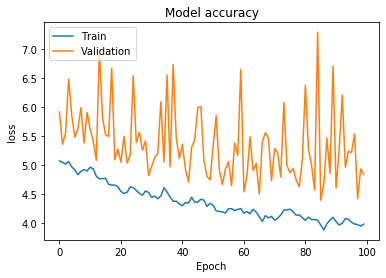

In [8]:
import matplotlib.pyplot as plt
# print(model.history.history)
# Plot training & validation accuracy values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [2]:
model.evaluate_generator(test_data_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[5.141305061487051, 0.72893775]

In [3]:
import numpy as np
test_steps_per_epoch = np.math.ceil(test_data_gen.samples / test_data_gen.batch_size)

predictions = model.predict_generator(test_data_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Instructions for updating:
Please use Model.predict, which supports generators.


In [4]:
predicted_classes

array([  0,   0,   0, ...,  74,  20, 101])

In [0]:
true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys()) 

In [6]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

          98       0.43      1.00      0.60        16
          99       0.50      0.69      0.58        13
          93       1.00      0.44      0.62         9
          97       0.80      0.31      0.44        13
          96       0.64      0.50      0.56        18
          94       0.89      0.97      0.93        33
          90       0.58      0.41      0.48        17
          95       0.86      0.72      0.78        25
          92       0.85      0.85      0.85        13
          91       1.00      0.67      0.80        15
           9       0.83      0.56      0.67         9
          89       0.96      0.73      0.83        37
          85       0.88      0.54      0.67        13
          82       0.80      0.70      0.74        23
          83       0.77      0.77      0.77        26
          84       0.92      0.65      0.76        17
          88       0.91      0.65      0.75        31
          86       0.90    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
metrics.accuracy_score(true_classes,predicted_classes)

0.7289377289377289

In [16]:
print(*true_classes, sep = ", ")








0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 

In [13]:
print(predicted_classes)

[  0   0   0 ...  74  20 101]


In [17]:
print(*predicted_classes, sep = ", ")

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 61, 1, 1, 1, 1, 1, 1, 65, 95, 60, 1, 1, 2, 67, 2, 7, 0, 66, 5, 2, 2, 35, 3, 4, 3, 80, 59, 3, 3, 88, 88, 97, 88, 88, 95, 98, 4, 60, 4, 4, 4, 60, 4, 95, 4, 4, 4, 4, 95, 3, 59, 59, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 80, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 98, 6, 35, 50, 6, 6, 6, 98, 98, 50, 59, 95, 6, 6, 98, 80, 6, 7, 7, 7, 7, 7, 69, 48, 7, 75, 7, 7, 7, 7, 7, 7, 7, 7, 48, 60, 7, 7, 59, 7, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 80, 68, 8, 8, 48, 69, 60, 9, 9, 9, 21, 9, 9, 9, 9, 9, 21, 9, 9, 92, 13, 62, 10, 10, 10, 10, 48, 10, 11, 11, 11, 98, 11, 96, 11, 59, 80, 11, 11, 14, 11, 11, 11, 11, 11, 50, 60, 11, 11, 11, 98, 60, 11, 11, 11, 11, 11, 6, 11, 11, 11, 11, 11, 11, 11, 63, 69, 12, 12, 12, 12, 12, 63, 95, 12, 95, 12, 95, 13, 0, 62, 13, 13, 13, 35, 13, 13, 35, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 48, 48, 14, 14, 14, 14, 35, 14, 35, 14, 17, 59, 14, 14, 14, 98, 14, 14, 14, 14, 14, 14, 14, 14, 88, 14, 14, 14, 14, 15, 15, 

In [18]:
 confusion_matrix = metrics.precision_recall_fscore_support(y_true=true_classes, y_pred=predicted_classes)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
confusion_matrix

(array([0.43243243, 0.5       , 1.        , 0.8       , 0.64285714,
        0.88888889, 0.58333333, 0.85714286, 0.84615385, 1.        ,
        0.83333333, 0.96428571, 0.875     , 0.8       , 0.76923077,
        0.91666667, 0.90909091, 0.9       , 1.        , 1.        ,
        0.94117647, 0.70833333, 0.75      , 0.86666667, 1.        ,
        1.        , 0.84210526, 1.        , 1.        , 0.93333333,
        1.        , 0.97560976, 0.9       , 1.        , 1.        ,
        0.22222222, 1.        , 1.        , 1.        , 1.        ,
        0.95454545, 1.        , 0.92307692, 1.        , 1.        ,
        0.88      , 0.8       , 0.95454545, 0.61538462, 0.81818182,
        0.51428571, 0.84615385, 0.88888889, 0.8       , 1.        ,
        0.7       , 0.85714286, 0.81818182, 0.6       , 0.18918919,
        0.47058824, 0.88888889, 0.26666667, 0.45833333, 0.66666667,
        0.88636364, 0.57142857, 0.6       , 0.78571429, 0.46875   ,
        0.85714286, 1.        , 0.6       , 0.66

In [22]:
tf.math.confusion_matrix(true_classes, predicted_classes)

<tf.Tensor: shape=(102, 102), dtype=int32, numpy=
array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 1,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  7,  0,  0],
       [ 0,  0,  0, ...,  0,  8,  0],
       [ 0,  0,  0, ...,  0,  0,  3]], dtype=int32)>

In [0]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [0]:
pred=model.predict_generator(test_data_gen)
classes=[_ for _ in range(102)]
cm=tf.math.confusion_matrix(true_classes, predicted_classes,num_classes=102)

con_mat_norm = np.around(tf.cast(cm,'float32') / np.sum(cm,axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

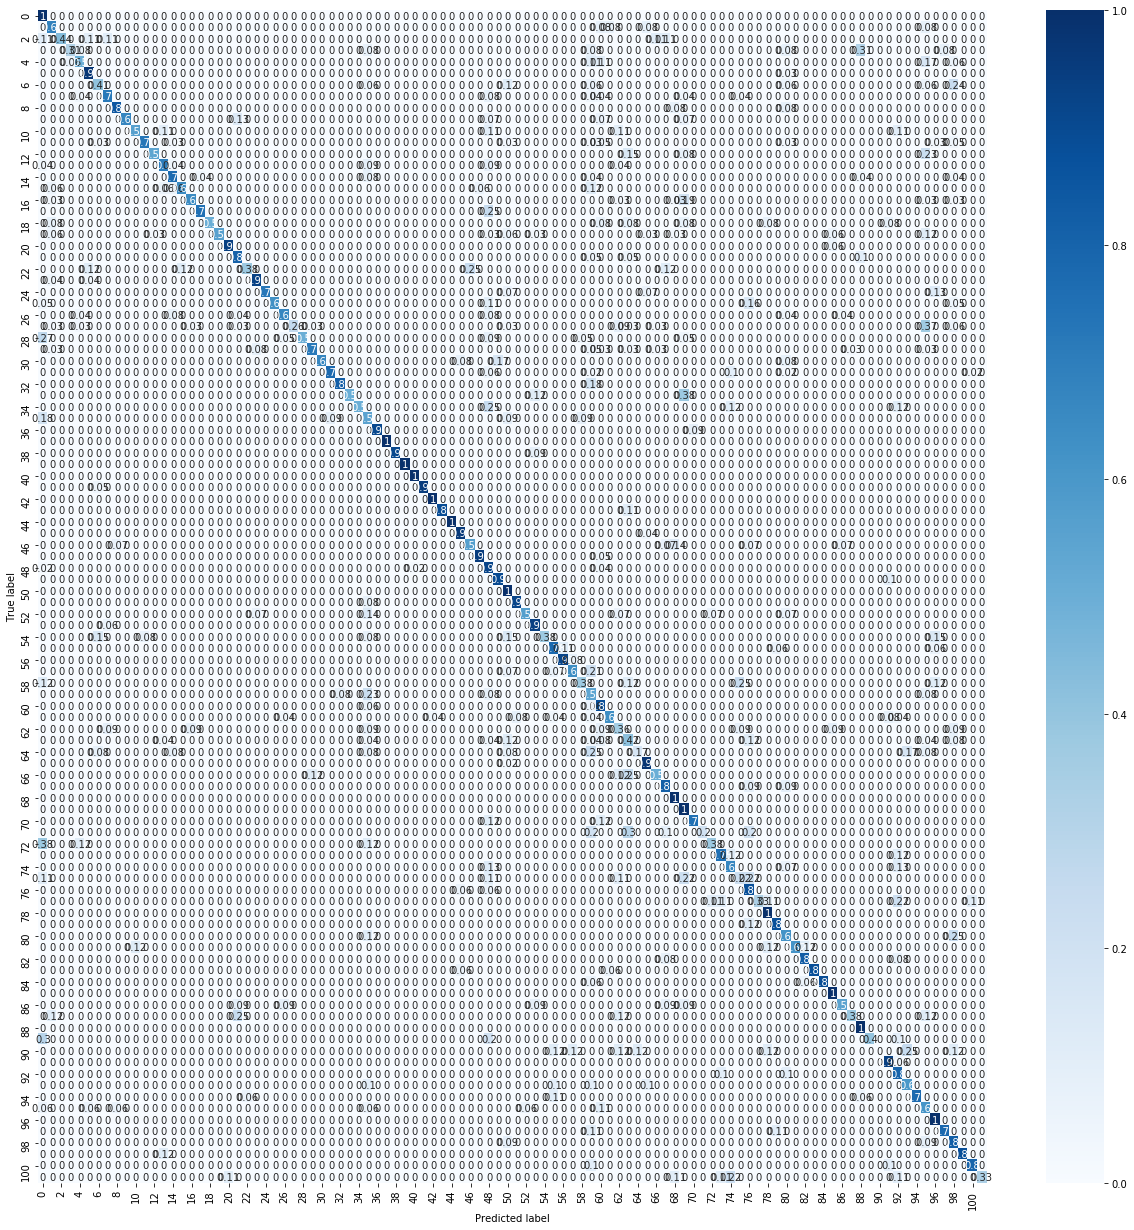

In [41]:
import seaborn as sns
figure = plt.figure(figsize=(17, 17))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
plt.savefig('cm.png')

<Figure size 432x288 with 0 Axes>

In [0]:
model.save('Trained1.h5')

model.evaluate_generator(test_data_gen)



import numpy as np
test_steps_per_epoch = np.math.ceil(test_data_gen.samples / test_data_gen.batch_size)

predictions = model.predict_generator(test_data_gen, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

#predicted_classes.sort()
predicted_classes

true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys())

from sklearn import metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

print(confusion_matrix(test_data_gen.classes, predicted_classes))
print('Classification Report')
target_names = class_labels
print(classification_report(test_data_gen.classes, predicted_classes, target_names=target_names))

report = metrics.classification_report(test_data_gen.classes, predicted_classes, target_names=class_labels)
print(report)

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

yhat_probs = model.predict(test_data_gen, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test_data_gen, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_data_gen.classes, class_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_data_gen.classes, class_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_data_gen.classes, class_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_data_gen.classes, class_labels)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(test_data_gen.classes, class_labels)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_data_gen.classes, class_labels)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_data_gen.classes, class_labels)
print(matrix)

In [31]:
[_ for _ in range(102)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101]